<a href="https://colab.research.google.com/github/SimarBhatiaSB7/EDA-Project-22BDS0046/blob/main/22BDS0046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import files
dataset = files.upload()

Saving KosteckiDillon.csv to KosteckiDillon.csv


In [4]:
import pandas as pd

df_0046 = pd.read_csv('KosteckiDillon.csv')
print(df_0046.head(7))

   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female


In [5]:
# Dimensions of the table
print("Dataset Dimensions:", df_0046.shape)

Dataset Dimensions: (4152, 10)


The dataset has 4,152 rows and 10 columns, which is a moderately large dataset, suitable for statistical analysis and visual exploration.

In [6]:
# Summary Statistics

print("Summary Statistics:")
print(df_0046.describe(include='all'))

print("\nData Types: ")
print(df_0046.dtypes)

Summary Statistics:
           rownames           id         time          dos   hatype  \
count   4152.000000  4152.000000  4152.000000  4152.000000     4152   
unique          NaN          NaN          NaN          NaN        3   
top             NaN          NaN          NaN          NaN  No Aura   
freq            NaN          NaN          NaN          NaN     1985   
mean    2076.500000    66.386802    15.455684   646.705925      NaN   
std     1198.723488    39.121812    21.737211   335.770123      NaN   
min        1.000000     1.000000   -29.000000    98.000000      NaN   
25%     1038.750000    33.000000     3.000000   384.000000      NaN   
50%     2076.500000    67.000000    12.000000   623.000000      NaN   
75%     3114.250000   100.000000    24.000000   950.000000      NaN   
max     4152.000000   133.000000    99.000000  1239.000000      NaN   

                age         airq  medication headache     sex  
count   4152.000000  4152.000000        4152     4152    4152  

The dataset contains both numeric (rownames, id, time, dos, age, airq) and categorical (hatype, medication, headache, sex) variables.

Some numeric columns (e.g., rownames, id, dos) have extremely high correlations, they might represent identifiers or sequential values rather than meaningful continuous variables.

In [7]:
#Data Handling

print("Missing Values:", pd.isna(df_0046).any())
print("\nDuplicated Values:", df_0046.duplicated())

Missing Values: rownames      False
id            False
time          False
dos           False
hatype        False
age           False
airq          False
medication    False
headache      False
sex           False
dtype: bool

Duplicated Values: 0       False
1       False
2       False
3       False
4       False
        ...  
4147    False
4148    False
4149    False
4150    False
4151    False
Length: 4152, dtype: bool


The dataset is clean in terms of completeness; no imputation is required, and no duplicate removal is necessary.

In [8]:
#Data Handling

# Drop duplicates
df_0046 = df_0046.drop_duplicates().copy()

# Fill missing values correctly
for col in df_0046.columns:
    if df_0046[col].dtype in ['int64', 'float64']:
        df_0046[col] = df_0046[col].fillna(df_0046[col].mean())
    else:
        df_0046[col] = df_0046[col].fillna(df_0046[col].mode()[0])

print("Clean Dataset:\n\n", df_0046.head(7))

Clean Dataset:

    rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female


In [9]:
#Data Binning

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80+']
df_0046_bin = df_0046.copy()
df_0046_bin['age_group'] = pd.cut(df_0046_bin['age'], bins=age_bins, labels=age_labels, right=False)

print("\nAge group counts:\n", df_0046_bin['age_group'].value_counts())

print("\n\nDataset binned by age:\n",df_0046_bin.head(7))


Age group counts:
 age_group
40-59    2261
20-39    1525
60-79     291
0-19       75
80+         0
Name: count, dtype: int64


Dataset binned by age:
    rownames  id  time  dos hatype  age  airq  medication headache     sex  \
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female   
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female   
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female   
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female   
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female   
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female   
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female   

  age_group  
0     20-39  
1     20-39  
2     20-39  
3     20-39  
4     20-39  
5     20-39  
6     20-39  


In [12]:
# Outlier Detection (IQR Method)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

num_cols = df_0046.select_dtypes(include=np.number).columns

outlier_summary = {}
for col in num_cols:
    Q1 = df_0046[col].quantile(0.25)
    Q3 = df_0046[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = df_0046[(df_0046[col] < lower) | (df_0046[col] > upper)].shape[0]
    outlier_summary[col] = outlier_count

    df_0046 = df_0046[(df_0046[col] >= lower) & (df_0046[col] <= upper)]

print("Outlier counts per numeric column:", outlier_summary)
print("Updated dataset after removing outliers:", df_0046.shape)

Outlier counts per numeric column: {'rownames': 0, 'id': 0, 'time': 210, 'dos': 0, 'age': 0, 'airq': 151}
Updated dataset after removing outliers: (3791, 10)


#Univariate Analysis


In [13]:
# Univariate Analysis
#Descriptive Statistics of the entire dataset
print(df_0046.describe(),"\n")

          rownames           id         time          dos          age  \
count  3791.000000  3791.000000  3791.000000  3791.000000  3791.000000   
mean   2112.800580    67.600106    12.477710   655.864943    42.501451   
std    1193.930346    38.915556    16.713209   333.861701    11.319464   
min       1.000000     1.000000   -28.000000    99.000000    18.000000   
25%    1116.500000    35.000000     3.000000   405.000000    33.000000   
50%    2155.000000    70.000000    11.000000   642.000000    44.000000   
75%    3132.500000   101.000000    21.000000   953.000000    51.000000   
max    4152.000000   133.000000    55.000000  1239.000000    66.000000   

              airq  
count  3791.000000  
mean     23.807702  
std       7.890558  
min       3.000000  
25%      18.000000  
50%      24.000000  
75%      28.000000  
max      45.000000   



Text(0.5, 0, 'Status')

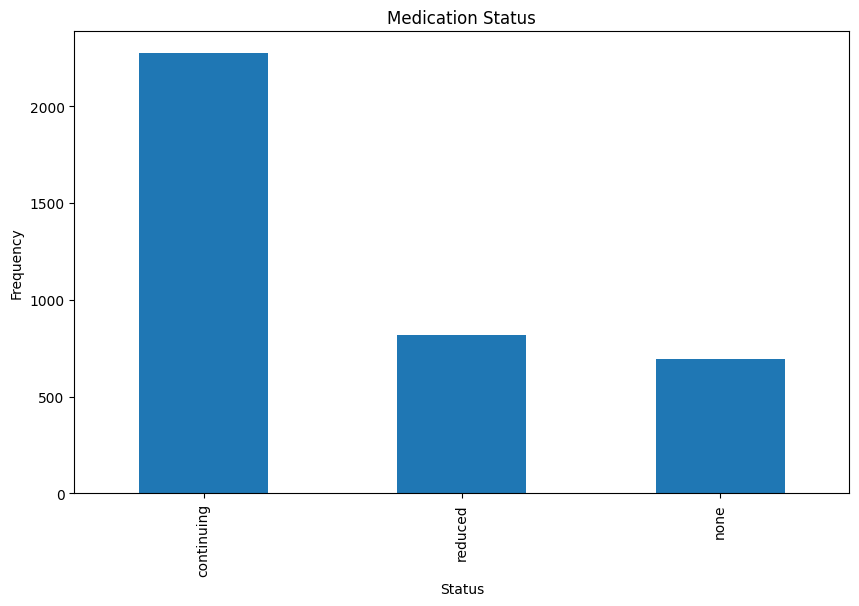

In [14]:
#Taking 50 largest values and draw a bar chart for medicine
df_0046.medication.value_counts().nlargest(100).plot(kind='bar', figsize=(10,6))
plt.title("Medication Status")
plt.ylabel('Frequency')
plt.xlabel('Status')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


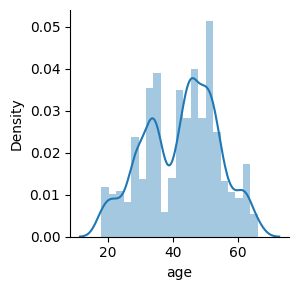

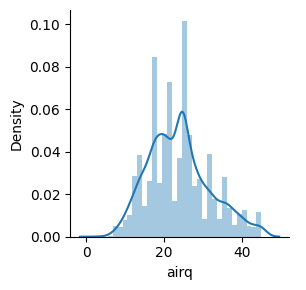

In [15]:
sns.FacetGrid(df_0046).map(sns.distplot,"age").add_legend()
print("\n")
sns.FacetGrid(df_0046).map(sns.distplot,"airq").add_legend()

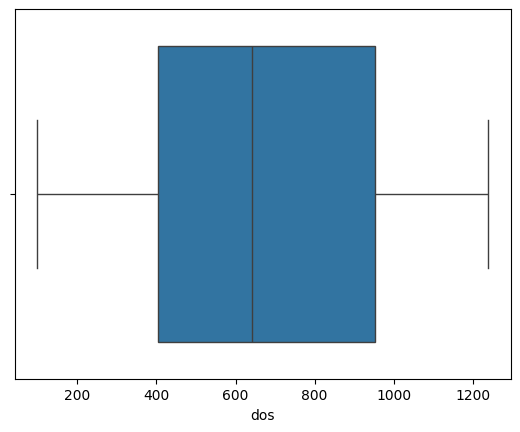

In [16]:
sns.boxplot(x="dos",data=df_0046)
plt.show()

#Bivariate Analysis

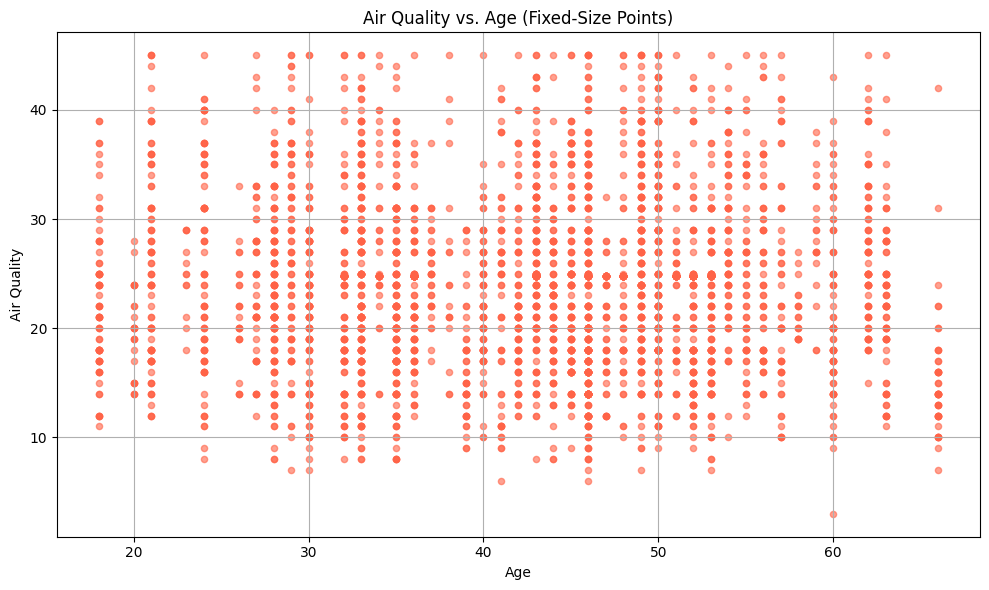

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_0046['age'], df_0046['airq'], s=20, alpha=0.6, color='tomato')
plt.title('Air Quality vs. Age (Fixed-Size Points)')
plt.xlabel('Age')
plt.ylabel('Air Quality')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_fixed_size.png')

In [18]:
#Relationship between two features
print(np.corrcoef(df_0046['age'], df_0046['airq']))
print("\n")
print(np.corrcoef(df_0046['age'], df_0046['dos']))
print("\n")
print(np.corrcoef(df_0046['dos'], df_0046['airq']))

[[ 1.         -0.01352406]
 [-0.01352406  1.        ]]


[[ 1.00000000e+00 -1.39235339e-04]
 [-1.39235339e-04  1.00000000e+00]]


[[ 1.         -0.10363695]
 [-0.10363695  1.        ]]


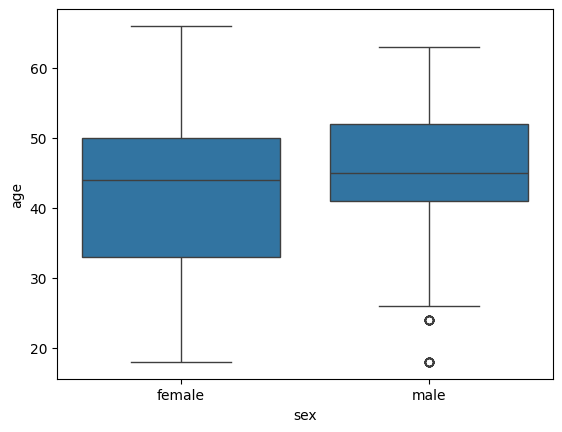

In [19]:
#Box plot
sns.boxplot(x="sex",y="age",data=df_0046)
plt.show()

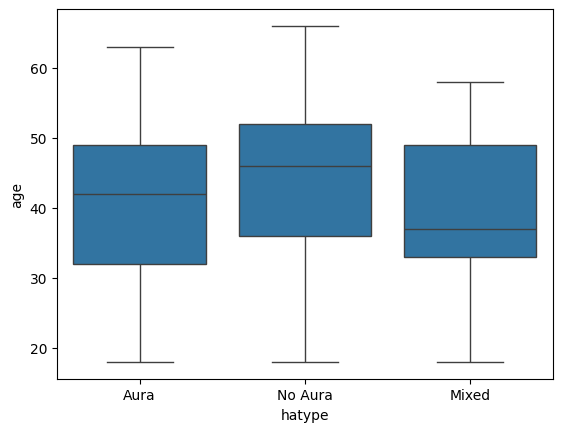

In [20]:
sns.boxplot(x="hatype",y="age",data=df_0046)
plt.show()

#Multivariate Analysis

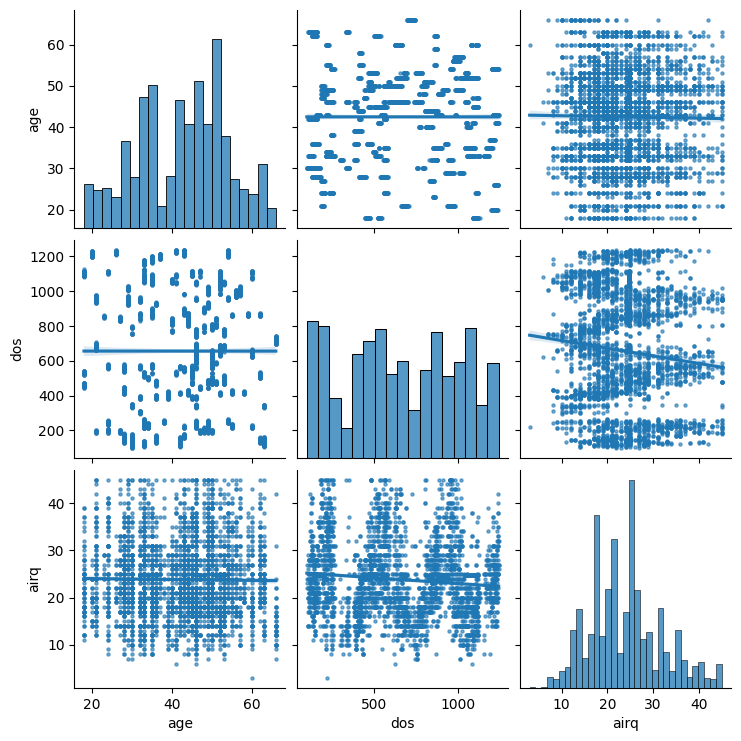

In [21]:
# pair plot with plot type regression
sns.pairplot(df_0046, vars=['age', 'dos', 'airq'], kind="reg", plot_kws={'scatter_kws': {'s': 5, 'alpha': 0.6}})
plt.show()

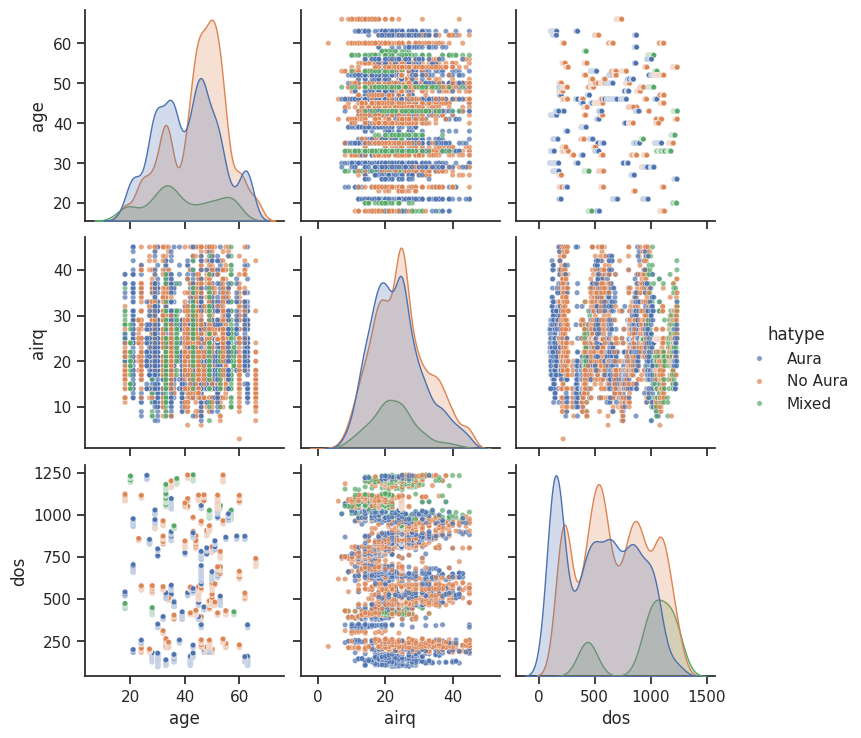

In [22]:
sns.set(style="ticks")
sns.pairplot(df_0046,
             vars=['age', 'airq', 'dos'],
             hue='hatype',
             height=2.5,
             plot_kws={'s': 15, 'alpha': 0.7})
plt.show()

In [23]:
correlation = df_0046.corr(method='pearson', numeric_only=True)
correlation

,rownames,id,time,dos,age,airq
rownames,1.000000,0.999381,-0.123510,0.969547,0.035125,-0.077276
id,0.999381,1.000000,-0.129044,0.969230,0.036767,-0.075657
time,-0.123510,-0.129044,1.000000,-0.084791,-0.031556,0.047117
dos,0.969547,0.969230,-0.084791,1.000000,-0.000139,-0.103637
age,0.035125,0.036767,-0.031556,-0.000139,1.000000,-0.013524
airq,-0.077276,-0.075657,0.047117,-0.103637,-0.013524,1.000000


<Axes: >

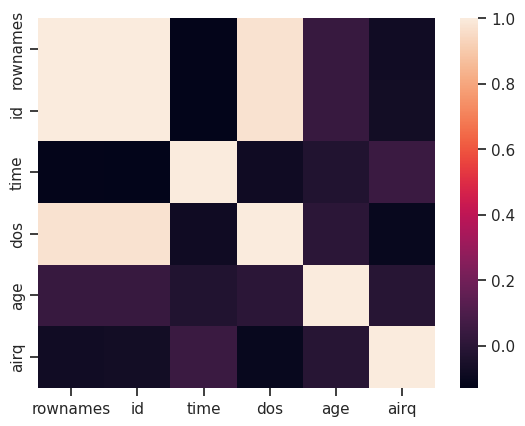

In [24]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)